Classification Report:
              precision    recall  f1-score   support

           N       0.87      0.79      0.83       165
           P       0.31      0.43      0.36        35

    accuracy                           0.73       200
   macro avg       0.59      0.61      0.59       200
weighted avg       0.77      0.73      0.75       200

Accuracy: 0.73


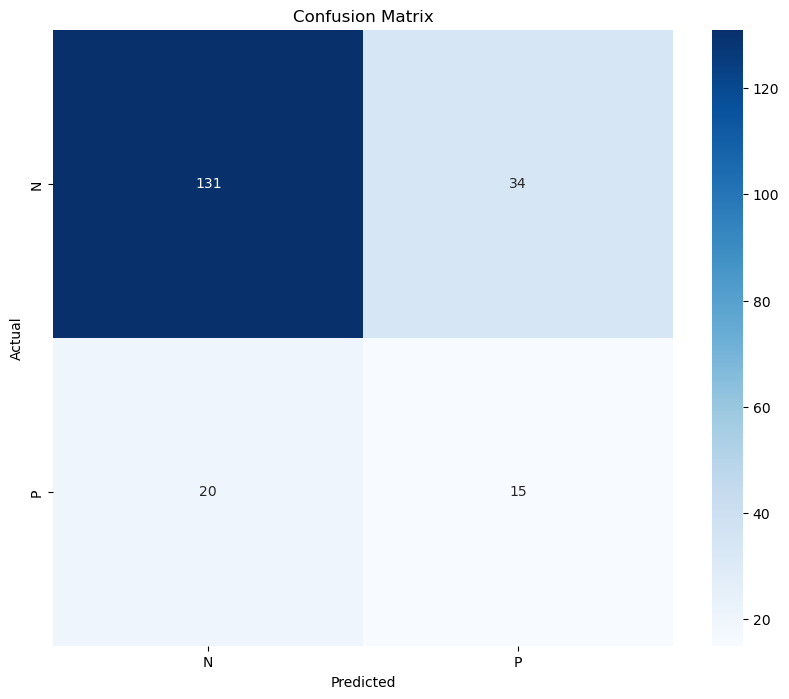

In [5]:
# sentiment analysis of text twitter data
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
 
 
def clean_tweet( tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        tweet = tweet.lower() 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
     
 
from many_stop_words import get_stop_words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from itertools import chain
 
from nltk.classify import NaiveBayesClassifier, accuracy
stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english'))   #About 150 stopwords
stop_words.extend(nltk_words)
 
def remove_stopwords(word_list):
  
        filtered_tweet=""
        for word in word_list:
            word = word.lower() # in case they arenet all lower cased
            if word not in stopwords.words("english"):
                filtered_tweet=filtered_tweet + " " + word
         
         
        return filtered_tweet.lstrip()
     
 
filename= "text_emotion.csv"
    
polarity = {'empty' : 'N',
                'sadness' : 'N',
                'enthusiasm' : 'P',
                'neutral' : 'neutral',
                'worry' : 'N',
                'surprise' : 'P',
                'love' : 'P',
                'fun' : 'P',
                'hate' : 'N',
                'happiness' : 'P',
                'boredom' : 'N',
                'relief' : 'P',
                'anger' : 'N'
         }  
    
tweets = []
training_data = []
import csv
with open(filename) as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    count=0
    for row in csvReader:
       
        if (row[1] == 'neutral' or row[1] == 'sentiment') :
            continue
        tweet= clean_tweet(row[3])
        tweet = remove_stopwords(tweet.split())
        tweets.append(tweet)
        training_data.append([tweet,  polarity[row[1]] ])
        count=count+1
        if (count >1000):
            break
         
vocabulary = set(chain(*[word_tokenize(i[0].lower()) for i in training_data]))
 
feature_set = [({i:(i in word_tokenize(sentence.lower())) for i in vocabulary},tag) for sentence, tag in training_data]
 
size = int(len(feature_set) * 0.2)
train_set, test_set = feature_set[size:], feature_set[:size]
 
classifier = NaiveBayesClassifier.train(train_set)

# Predictions
predicted = classifier.classify_many([fs for fs, _ in test_set])
actual = [tag for _, tag in test_set]

# Classification report
print("Classification Report:")
print(classification_report(actual, predicted))

# Accuracy
accuracy = accuracy(classifier, test_set)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(actual, predicted)
labels = list(set(actual))

# Confusion matrix visualization
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [2]:
!pip install many-stop-words

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for many-stop-words: filename=many_stop_words-0.2.2-py3-none-any.whl size=26223 sha256=a54168f17e05fa27876a20f88d6ab85ce943d1fceeb5e4bbfe080c5fe10be9b9
  Stored in directory: c:\users\sync\appdata\local\pip\cache\wheels\a3\95\84\8da1a39a0ea0218b3c9eb49be7ddc649b94c830540f624009b
Successfully built many-stop-words
